
## Régression logistique

_Fichier à modifier_ : [`logistic_regression.ipynb`](./logistic_regression.ipynb)

La régression logistique fonctionne un peu comme la régression linéaire, cependant c'est un problème de classification (ici binaire).

## Implémentation

1. Créer les données :
   1. Générer un jeu de données `S` de couples $(x, y)$ où $x \in \mathbb{R}^2$ et $y = \mathbf{1}_{w x + b > 0}$. Garder les paramètres $\theta := (w, b)$ pour la suite.
   2. Visualiser les données et la frontière $w x + b = 0$.
   3. Séparer les données en deux datasets : un jeu d'entraînement (`S_train`, 80 %) et un jeu de validation (`S_test`, 20 %).
2. Entraîner un modèle $\theta_0$ de régression logistique (`nn.Linear` + `nn.Sigmoid`) avec la perte _binary cross-entropy_ (`torch.nn.BCELoss`) et la descente de gradient stochastique (`torch.optim.SGD`).
3. Créer un nouveau jeu de données corrompu `S_corr` à partir `S` en appliquant du _label flipping_ à une fraction $\alpha \in [0, 1]$ des données $(x, y)$ : pour cette partie, on remplace le label $y$ par son opposé, $1 - y$.
4. Visualiser les données corrompues.
5. Créer un nouveau modèle  $\theta_1$ et l'entraîner sur ce nouveau jeu de données corrompu. Afficher la précision de $\theta_1$ sur `S_test`.
6. Dans les sous-questions suivantes, on va créer de **nouveaux** modèles avec des paramètres différents (écrire une fonction pour éviter de répéter le code de la question précédente). Afficher les différentes courbes de précision lorsque l'on fait varier un paramètre.
   1. Faire varier la valeur de $\alpha$.
   2. Créer un nouveau jeu de données de sorte que les valeurs de $x$ ne sont pas réparties uniformément, et refaire l'expérience. Par exemple, on concentre les valeurs de $x$ autour de $1$ ou plusieurs clusters (avec un mélange gaussien par exemple). Faire en sorte qu'au moins un des clusters soit proche de la frontière de classification. Que se passe-t-il ? On utilisera ce nouveau jeu de données dans la suite.
   3. Que se passe-t-il si l'on applique le _label flipping_ spécifiquement sur les points $x$ très proches de la frontière ?
   4. Faire varier la dimension de `x`.
7. _Bonus_ : que se passe-t-il si l'on rajoute des couches (_hidden layers_) ?
8. _Bonus_ : que se passe-t-il avec peu de données ?
9.  _Bonus_ : que se passe-t-il si au lieu de créer un nouveau modèle $\theta_1$, on continue l'entraînement du modèle $\theta$ sur `S_corr` ?

## Analyse
   1. Faire le lien avec les chapitres sur la classification dans le cours de Statistiques.
   2. Expliquer brièvement le concept du mélange gaussien.
   3. Établir une relation empirique entre l'imprécision du modèle et la proportion de points "proches" de la frontière.
   4. Faire le lien avec le concept du jailbreaking. Pour illustration, voir la slide 26 : _Évasion (jailbreaking)_ de la [conférence de Lê Nguyên Hoang en décembre 2024](https://science4all.org/wp-content/uploads/2024/12/piaf.pdf)
   5. Établir une relation empirique entre l'imprécision du modèle et la dimension de `x`.
   6. Peut-on imaginer un moyen d'identifier l'empoisonnement, de filtrer les données suspicieuses ou d'agréger les gradients d'un mini-batch de manière robuste ? Exemple d'approche sur [Scikit-Learn](https://scikit-learn-extra.readthedocs.io/en/stable/modules/robust.html)

In [21]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Generate the dataset

In [10]:
# 0) Prepare data
S = datasets.load_iris()
X, y = bc.data, bc.target

n_samples, n_features = X.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2501)

print (n_samples, n_features)

569 30


In [ ]:
#Scaling

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)


In [116]:
X = torch.randn((1000, 2))
X1 = X[:, 0]
X2 = X[:, 1]
W = torch.randn(1)

b = torch.randn(1)

Z = W * X1 + b
y = (X2 > Z).int()
S=(X,y)

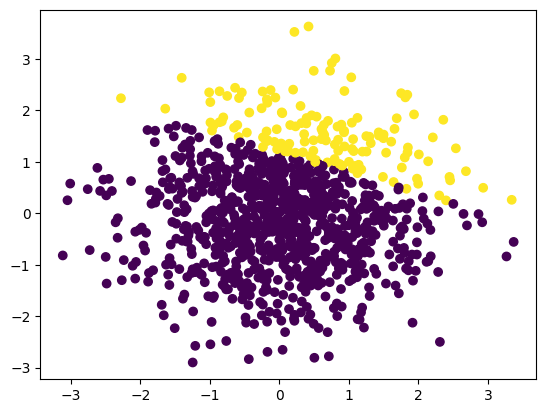

In [115]:
plt.scatter(X1, X2, c=y)

In [118]:
n_features = 2

In [110]:
x.shape

torch.Size([1000, 2])

RuntimeError: shape '[1, 1]' is invalid for input of size 2000

In [119]:
# 1) Model
# Linear model f = wx + b , sigmoid at the end
class Model(nn.Module):
    def __init__(self, n_input_features):
        super(Model, self).__init__()
        self.linear = nn.Linear(n_input_features, 1)

    def forward(self, x):
        y_pred = torch.sigmoid(self.linear(x))
        return y_pred



In [120]:
model = Model(n_features)

In [121]:

model(X)

tensor([[0.4721],
        [0.5401],
        [0.4295],
        [0.5337],
        [0.4357],
        [0.6025],
        [0.6509],
        [0.4736],
        [0.6658],
        [0.5203],
        [0.6526],
        [0.6150],
        [0.2968],
        [0.6819],
        [0.6138],
        [0.5842],
        [0.4168],
        [0.6519],
        [0.3563],
        [0.5752],
        [0.3679],
        [0.4594],
        [0.5479],
        [0.6320],
        [0.5143],
        [0.5063],
        [0.7117],
        [0.5233],
        [0.3544],
        [0.4118],
        [0.4429],
        [0.4041],
        [0.5815],
        [0.5426],
        [0.6441],
        [0.3804],
        [0.3716],
        [0.4735],
        [0.3349],
        [0.4668],
        [0.5141],
        [0.6377],
        [0.5186],
        [0.3454],
        [0.4830],
        [0.4473],
        [0.5863],
        [0.4630],
        [0.7063],
        [0.2431],
        [0.5174],
        [0.4678],
        [0.5784],
        [0.5009],
        [0.5074],
        [0